# Importation des bibliothèques nécéssaires

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from geopy.geocoders import Nominatim
import asyncio
from concurrent.futures import ThreadPoolExecutor
from geopy.geocoders import Nominatim
import folium
import webbrowser

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tkinter as tk
from tkinter import *
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

from PIL import Image, ImageTk
import imageio

# Importation des données 

In [4]:
#Importation des données 
lien = "C:\\Users\\Acer\\Documents\\mon projet python\\Sales_Data"
files = [file for file in os.listdir(lien) if file.endswith('.csv')] #récupérer la liste des noms des fichiers CSV dans le répertoire sales_data
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [5]:
#Création d'un dataFrame vide
Datas = pd.DataFrame()
#Regroupper tous les fichiers dans Datas
for file in files:
    data = pd.read_csv(lien +'\\'+ file) 
    Datas = pd.concat([Datas, data])

Datas

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
#Convertir la base de donnée en CSV
Datas.to_csv("C:\\Users\\Acer\\Documents\\mon projet python\\new_data"+'\\Datas.csv', index=False)

In [7]:
Datas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


# Nettoyage des données

In [9]:
#Voir la valeurs manquantes
Datas.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
#Supprimer la valeurs manquantes
Datas = Datas.dropna()

In [11]:
Datas.shape

(186305, 6)

In [12]:
Datas.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [13]:
Datas[Datas["Order Date"] == "Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
Datas.drop(Datas[Datas["Order Date"] == "Order Date"].index)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [15]:
DatasN = Datas.drop(Datas.loc[Datas['Order Date'] == "Order Date", :].index)

In [16]:
DatasN.loc[~DatasN['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
DatasN

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [18]:
DatasN['Quantity Ordered'] = DatasN['Quantity Ordered'].astype('int')

In [19]:
DatasN['Price Each'] = pd.to_numeric(DatasN['Price Each'])

In [20]:
DatasN['Order Date'] = pd.to_datetime(DatasN['Order Date'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_14148\3137669930.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DatasN['Order Date'] = pd.to_datetime(DatasN['Order Date'])


In [21]:
DatasN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int32         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.1+ MB


In [22]:
Datas['Order Date']

0        04/19/19 08:46
2        04/07/19 22:30
3        04/12/19 14:38
4        04/12/19 14:38
5        04/30/19 09:27
              ...      
11681    09/17/19 20:56
11682    09/01/19 16:00
11683    09/23/19 07:39
11684    09/19/19 17:30
11685    09/30/19 00:18
Name: Order Date, Length: 186305, dtype: object

In [23]:
DatasN['Order Date']

0       2019-04-19 08:46:00
2       2019-04-07 22:30:00
3       2019-04-12 14:38:00
4       2019-04-12 14:38:00
5       2019-04-30 09:27:00
                ...        
11681   2019-09-17 20:56:00
11682   2019-09-01 16:00:00
11683   2019-09-23 07:39:00
11684   2019-09-19 17:30:00
11685   2019-09-30 00:18:00
Name: Order Date, Length: 182735, dtype: datetime64[ns]

# Affichage du  dataset de l’année avec un graphe histogramme.

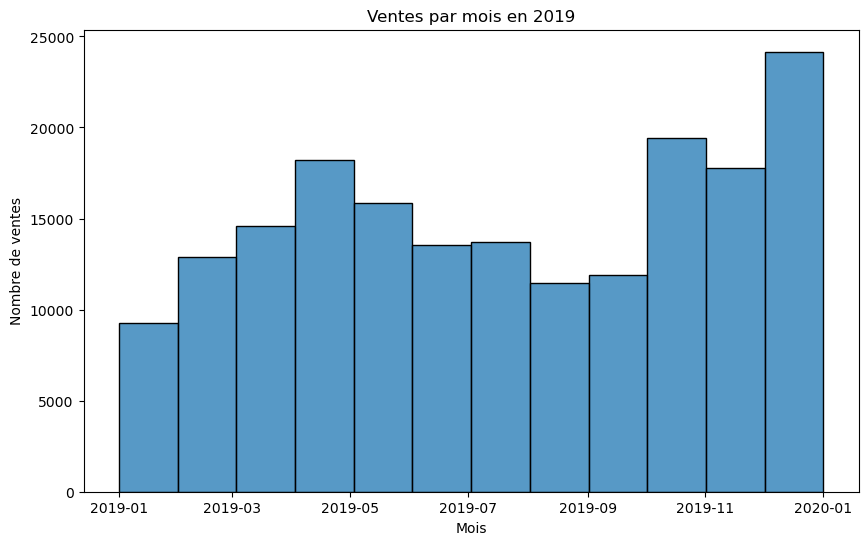

In [25]:
DatasN['Order Date'] = pd.to_datetime(DatasN['Order Date'])

# Création d'un histogramme
plt.figure(figsize=(10, 6))
sns.histplot(DatasN['Order Date'], bins=12, kde=False)
plt.title('Ventes par mois en 2019')
plt.xlabel('Mois')
plt.ylabel('Nombre de ventes')
plt.show()

# Quel est le meilleur mois de vente ? Quel est le chiffre d'affaires de ce mois ?

In [27]:
DatasN.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [28]:
DatasN['Order Date'] = pd.to_datetime(DatasN['Order Date'])
DatasN  = DatasN.set_index('Order Date')
DatasN  = DatasN.sort_index()
DatasN['Months'] = DatasN.index.month_name()
DatasN = DatasN.reset_index()

# Sélectionner toutes les colonnes sauf la première
cols = DatasN.columns.tolist()
cols = cols[1:5] + cols[:1] + cols[5:]  

# Réorganiser les colonnes
DatasN = DatasN[cols]

DatasN['Months'].unique()
DatasN['Months'].dtypes

dtype('O')

In [29]:
DatasN['Chiffre d\'affaire'] = DatasN['Quantity Ordered'] * DatasN['Price Each']

In [30]:
DatasN.groupby('Months')['Chiffre d\'affaire'].sum().sort_values(ascending=False)

Months
December     4557905.42
October      3679254.16
April        3336376.42
November     3149785.09
May          3101881.04
March        2755969.40
July         2587444.91
June         2524464.99
August       2191698.31
February     2158127.48
September    2050361.26
January      1786511.29
Name: Chiffre d'affaire, dtype: float64

In [31]:
order = ["January", "February", "March", "April", "May", "June", "July", "August","September", "October", "November", 
         "December"]

In [32]:
monthly_sales = DatasN.groupby('Months')['Chiffre d\'affaire'].sum().loc[order]

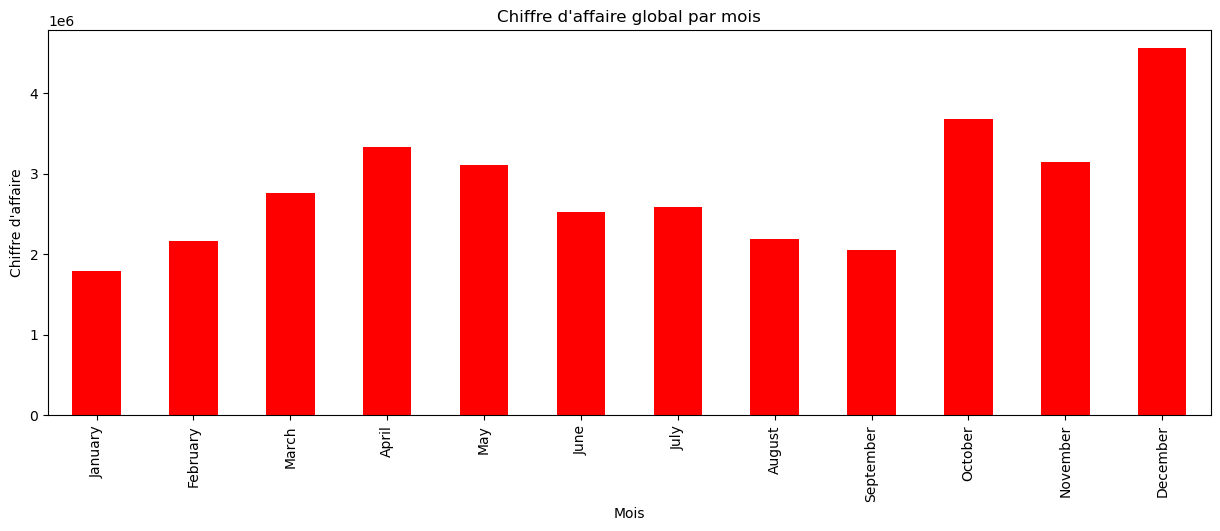

Le meilleur mois de vente est December avec un chiffre d'affaires de $4,557,905.42


In [33]:
fig = plt.figure(figsize=(15,5))
DatasN.groupby('Months')["Chiffre d'affaire"].sum().loc[order].plot.bar(color='red')
plt.title("Chiffre d'affaire global par mois")
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaire")
plt.show()

# Trouver le mois avec le chiffre d'affaires le plus élevé
best_month = monthly_sales.idxmax()
revenue_best_month = monthly_sales.max()

print(f"Le meilleur mois de vente est {best_month} avec un chiffre d'affaires de ${revenue_best_month:,.2f}")

# Dans quelle ville a-t-on le plus vendu de produits ? et le moins vendu ? afficher les résultats avec des cartes géographiques.

In [35]:
DatasN.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Chiffre d'affaire
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90


In [36]:
#Extraires les villes :
def villes(v):
    return v.split(',')[1].strip()

In [37]:
DatasN['Villes'] = DatasN['Purchase Address'].apply(villes)
DatasN['Villes']

0         New York City
1         San Francisco
2         New York City
3                Dallas
4               Atlanta
              ...      
182730         Portland
182731    New York City
182732    San Francisco
182733    New York City
182734    New York City
Name: Villes, Length: 182735, dtype: object

In [38]:
DatasN.groupby('Villes')["Quantity Ordered"].count().sort_values(ascending=False)

Villes
San Francisco    43948
Los Angeles      29107
New York City    24456
Boston           19575
Atlanta          14616
Dallas           14571
Seattle          14487
Portland         12261
Austin            9714
Name: Quantity Ordered, dtype: int64

In [39]:
DatasN.groupby('Villes')["Chiffre d'affaire"].sum().sort_values(ascending=False)

Villes
San Francisco    8124120.94
Los Angeles      5354039.93
New York City    4581658.91
Boston           3604080.86
Atlanta          2741642.05
Dallas           2717793.72
Seattle          2693048.60
Portland         2276649.24
Austin           1786745.52
Name: Chiffre d'affaire, dtype: float64

In [40]:
DatasN.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Chiffre d'affaire,Villes
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99,New York City
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00,New York City
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta


Ville avec le plus de ventes : San Francisco (Quantité vendue : 49363, Chiffre d'affaire : 8124120.94 $)
Ville avec le moins de ventes : Austin (Quantité vendue : 10933, Chiffre d'affaire : 1786745.52 $) 
Coordonnées géographiques de San Fransisco :  37.7792588 -122.4193286
Coordonnées géographiques d'Austin' :  30.2711286 -97.7436995


C:\Users\Acer\AppData\Local\Temp\ipykernel_14148\3352280058.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df3["Sales"], y = df3["Villes"], data = df3, orient="h", palette = "viridis")


True

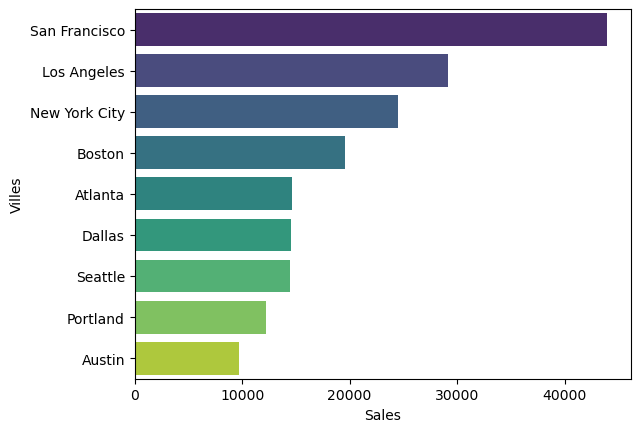

In [41]:
def get_coordinates(city):
    geolocator = Nominatim(user_agent="geo_locator")
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None   
    
    
    
# DataFrame avec les villes et la quantité vendue
ventes_par_ville = DatasN.groupby('Villes')['Quantity Ordered'].sum().sort_values(ascending=False)
ventes_par_ville1 = DatasN.groupby('Villes')["Chiffre d'affaire"].sum().sort_values(ascending=False)

ville_plus_vendue = ventes_par_ville.idxmax()
ventes_plus_vendue = ventes_par_ville.max()

ville_moins_vendue = ventes_par_ville.idxmin()
ventes_moins_vendue = ventes_par_ville.min()

print(f"Ville avec le plus de ventes : {ville_plus_vendue} (Quantité vendue : {ventes_plus_vendue}, Chiffre d'affaire : {round(ventes_par_ville1.max(), 3)} $)")
print(f"Ville avec le moins de ventes : {ville_moins_vendue} (Quantité vendue : {ventes_moins_vendue}, Chiffre d'affaire : {round(ventes_par_ville1.min(), 3)} $) ")


# Utilisez la fonction pour obtenir les coordonnées
lat1, lon1 = get_coordinates(ville_plus_vendue)
lat2, lon2 = get_coordinates(ville_moins_vendue)
print("Coordonnées géographiques de San Fransisco : ", lat1, lon1)
print("Coordonnées géographiques d'Austin' : ", lat2, lon2)

df3 = pd.read_csv('C:\\Users\\Acer\\Documents\\mon projet python\\new_data\\ChiffreParVille.csv')
sns.barplot(x = df3["Sales"], y = df3["Villes"], data = df3, orient="h", palette = "viridis")

# Créer une carte centrée sur la première ville
carte = folium.Map(location = [lat1, lon1], zoom_start = 5)
carte2= folium.Map(location = [lat2, lon2], zoom_start = 5)

# Ajouter des marqueurs pour les deux villes
folium.Marker([lat1, lon1], popup=f"{ville_plus_vendue} \n {ventes_plus_vendue} ventes, {round(ventes_par_ville1.max(), 3)} $ de CA", icon = folium.Icon(color = 'green')).add_to(carte)
folium.Marker([lat2, lon2], popup=f"{ville_moins_vendue} \n {ventes_moins_vendue} ventes, {round(ventes_par_ville1.min(), 3)} $ de CA", icon = folium.Icon(color = 'red')).add_to(carte)

# Afficher la carte
carte.save("carte_ventes.html")
carte2.save("carte_ventes2.html")


webbrowser.open("carte_ventes.html","carte_ventes2.html")

# A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ? quelles sont les heures à éviter ?

In [43]:
DatasN['Hour'] = DatasN['Order Date'].dt.hour

In [44]:
DatasN

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Chiffre d'affaire,Villes,Hour
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6
...,...,...,...,...,...,...,...,...,...,...
182730,304165,AAA Batteries (4-pack),1,2.99,2020-01-01 04:13:00,"825 Adams St, Portland, OR 97035",January,2.99,Portland,4
182731,299125,USB-C Charging Cable,1,11.95,2020-01-01 04:21:00,"754 Hickory St, New York City, NY 10001",January,11.95,New York City,4
182732,305840,Bose SoundSport Headphones,1,99.99,2020-01-01 04:54:00,"784 River St, San Francisco, CA 94016",January,99.99,San Francisco,4
182733,300519,Bose SoundSport Headphones,1,99.99,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001",January,99.99,New York City,5


Heure avec le plus de ventes : 19h (Quantité vendue : 14228 produits)
Heure avec le moins de ventes : 3h (Quantité vendue : 912 produits)


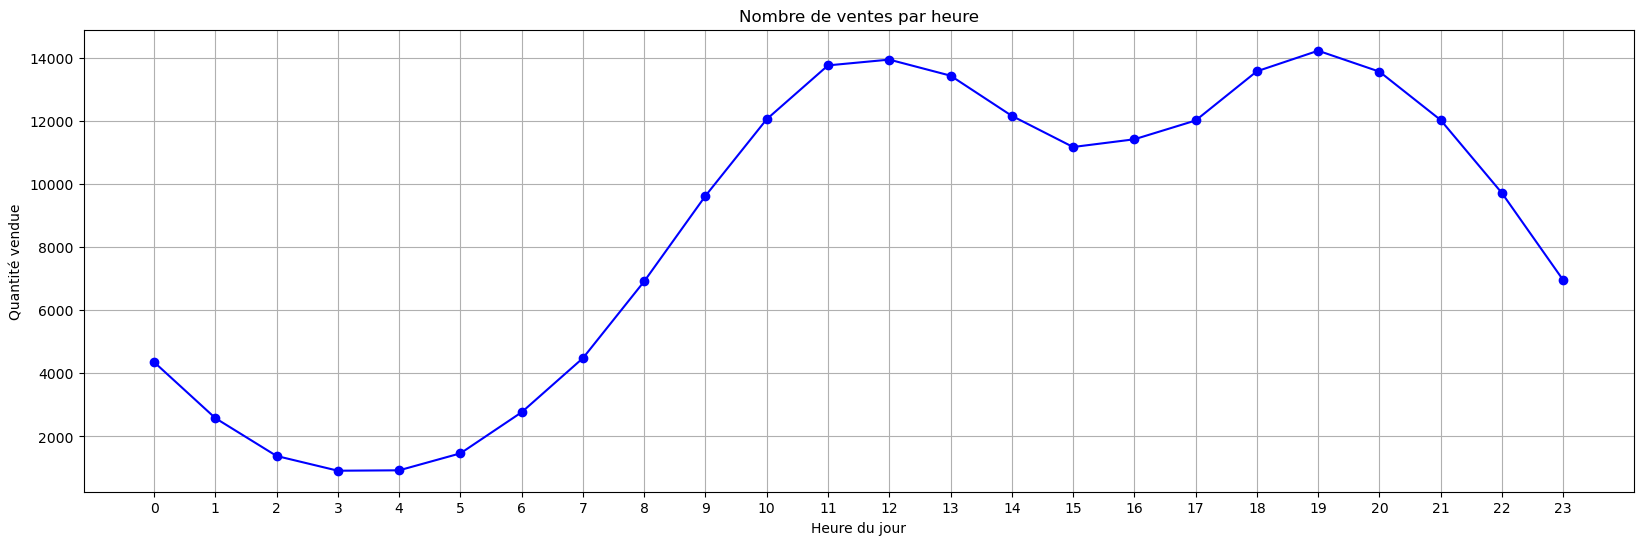

Il est alors préférable de faire passer une page de publicité entre 10h et 11h, et entre 18h et 19h.
Et éviter d'en faire passer entre 3h et 4h.


In [45]:
# Calculer le nombre de ventes pour chaque heure
ventes_par_heure = DatasN.groupby('Hour')['Quantity Ordered'].sum()


# Trouver l'heure avec le plus de ventes
heure_plus_ventes = ventes_par_heure.idxmax()
ventes_plus_ventes = ventes_par_heure.max()

# Trouver l'heure avec le moins de ventes
heure_moins_ventes = ventes_par_heure.idxmin()
ventes_moins_ventes = ventes_par_heure.min()

print(f"Heure avec le plus de ventes : {heure_plus_ventes}h (Quantité vendue : {ventes_plus_ventes} produits)")
print(f"Heure avec le moins de ventes : {heure_moins_ventes}h (Quantité vendue : {ventes_moins_ventes} produits)")

# Tracer le graphique
plt.figure(figsize=(20, 6))
plt.plot(ventes_par_heure.index, ventes_par_heure.values, marker='o', linestyle='-', color='b')
plt.title('Nombre de ventes par heure')
plt.xlabel('Heure du jour')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plt.ylabel('Quantité vendue')
plt.grid(True)
plt.show()
print("Il est alors préférable de faire passer une page de publicité entre 10h et 11h, et entre 18h et 19h.")
print("Et éviter d'en faire passer entre 3h et 4h.")

# Quel est le profit de l’entreprise durant l’année ?


In [47]:
DatasN

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Chiffre d'affaire,Villes,Hour
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6
...,...,...,...,...,...,...,...,...,...,...
182730,304165,AAA Batteries (4-pack),1,2.99,2020-01-01 04:13:00,"825 Adams St, Portland, OR 97035",January,2.99,Portland,4
182731,299125,USB-C Charging Cable,1,11.95,2020-01-01 04:21:00,"754 Hickory St, New York City, NY 10001",January,11.95,New York City,4
182732,305840,Bose SoundSport Headphones,1,99.99,2020-01-01 04:54:00,"784 River St, San Francisco, CA 94016",January,99.99,San Francisco,4
182733,300519,Bose SoundSport Headphones,1,99.99,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001",January,99.99,New York City,5


In [48]:
def profit():
    print("Le profit de l'entreprise durant l'année 2019 est de :", round(DatasN["Chiffre d'affaire"].sum(), 3), "$")
          
profit()

Le profit de l'entreprise durant l'année 2019 est de : 33879779.77 $


# Quels sont les produits qui sont souvent achetés ensemble ? et les produits les moins achetés ?

In [50]:
#Les élments dupliqués
df = DatasN[DatasN['Order ID'].duplicated(keep=False)]

In [51]:
#Regrouper les produits 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

C:\Users\Acer\AppData\Local\Temp\ipykernel_14148\3107180948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [52]:
df['Grouped']

11                                  Wired Headphones,iPhone
12                                  Wired Headphones,iPhone
65                        USB-C Charging Cable,Google Phone
66                        USB-C Charging Cable,Google Phone
79                          iPhone,Lightning Charging Cable
                                ...                        
182702                      iPhone,Apple Airpods Headphones
182705                      Lightning Charging Cable,iPhone
182706                      Lightning Charging Cable,iPhone
182733    Bose SoundSport Headphones,Lightning Charging ...
182734    Bose SoundSport Headphones,Lightning Charging ...
Name: Grouped, Length: 14214, dtype: object

In [53]:
df = df.drop_duplicates(subset = ['Order ID'])

In [54]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Chiffre d'affaire,Villes,Hour,Grouped
11,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",January,11.99,New York City,7,"Wired Headphones,iPhone"
65,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",January,11.95,Atlanta,11,"USB-C Charging Cable,Google Phone"
79,148450,iPhone,1,700.00,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",January,700.00,Dallas,12,"iPhone,Lightning Charging Cable"
92,144679,Google Phone,1,600.00,2019-01-01 12:51:00,"984 Lakeview St, San Francisco, CA 94016",January,600.00,San Francisco,12,"Google Phone,USB-C Charging Cable"
94,147451,Google Phone,1,600.00,2019-01-01 12:57:00,"229 Elm St, New York City, NY 10001",January,600.00,New York City,12,"Google Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
182592,301832,AAA Batteries (4-pack),1,2.99,2019-12-31 20:51:00,"774 Washington St, San Francisco, CA 94016",December,2.99,San Francisco,20,"AAA Batteries (4-pack),20in Monitor"
182646,311036,AAA Batteries (4-pack),3,2.99,2019-12-31 22:04:00,"138 Lincoln St, Los Angeles, CA 90001",December,8.97,Los Angeles,22,"AAA Batteries (4-pack),Macbook Pro Laptop"
182701,311386,iPhone,1,700.00,2020-01-01 00:10:00,"730 Pine St, San Francisco, CA 94016",January,700.00,San Francisco,0,"iPhone,Apple Airpods Headphones"
182705,297817,Lightning Charging Cable,2,14.95,2020-01-01 00:22:00,"519 13th St, New York City, NY 10001",January,29.90,New York City,0,"Lightning Charging Cable,iPhone"


In [55]:
df['Grouped'].value_counts()

Grouped
iPhone,Lightning Charging Cable                                                  444
Google Phone,USB-C Charging Cable                                                435
Lightning Charging Cable,iPhone                                                  425
USB-C Charging Cable,Google Phone                                                405
iPhone,Wired Headphones                                                          197
                                                                                ... 
AA Batteries (4-pack),LG Dryer                                                     1
AAA Batteries (4-pack),iPhone,Apple Airpods Headphones                             1
Google Phone,Bose SoundSport Headphones,Wired Headphones,USB-C Charging Cable      1
LG Dryer,Lightning Charging Cable                                                  1
iPhone,Wired Headphones,Apple Airpods Headphones                                   1
Name: count, Length: 409, dtype: int64

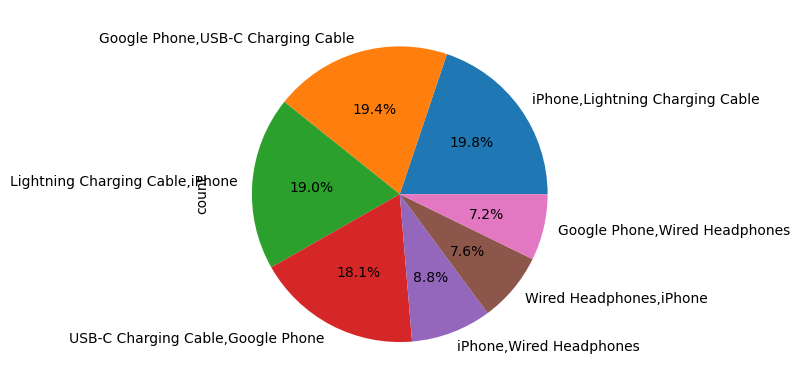

In [56]:
df['Grouped'].value_counts()[0:7].plot.pie(autopct = '%1.1f%%')
plt.show()

Les produits qui sont vendus le plus ensemble : iPhone,Lightning Charging Cable 
Les produits qui sont vendus le moins ensemble : Wired Headphones,iPhone,Apple Airpods Headphones,Lightning Charging Cable 


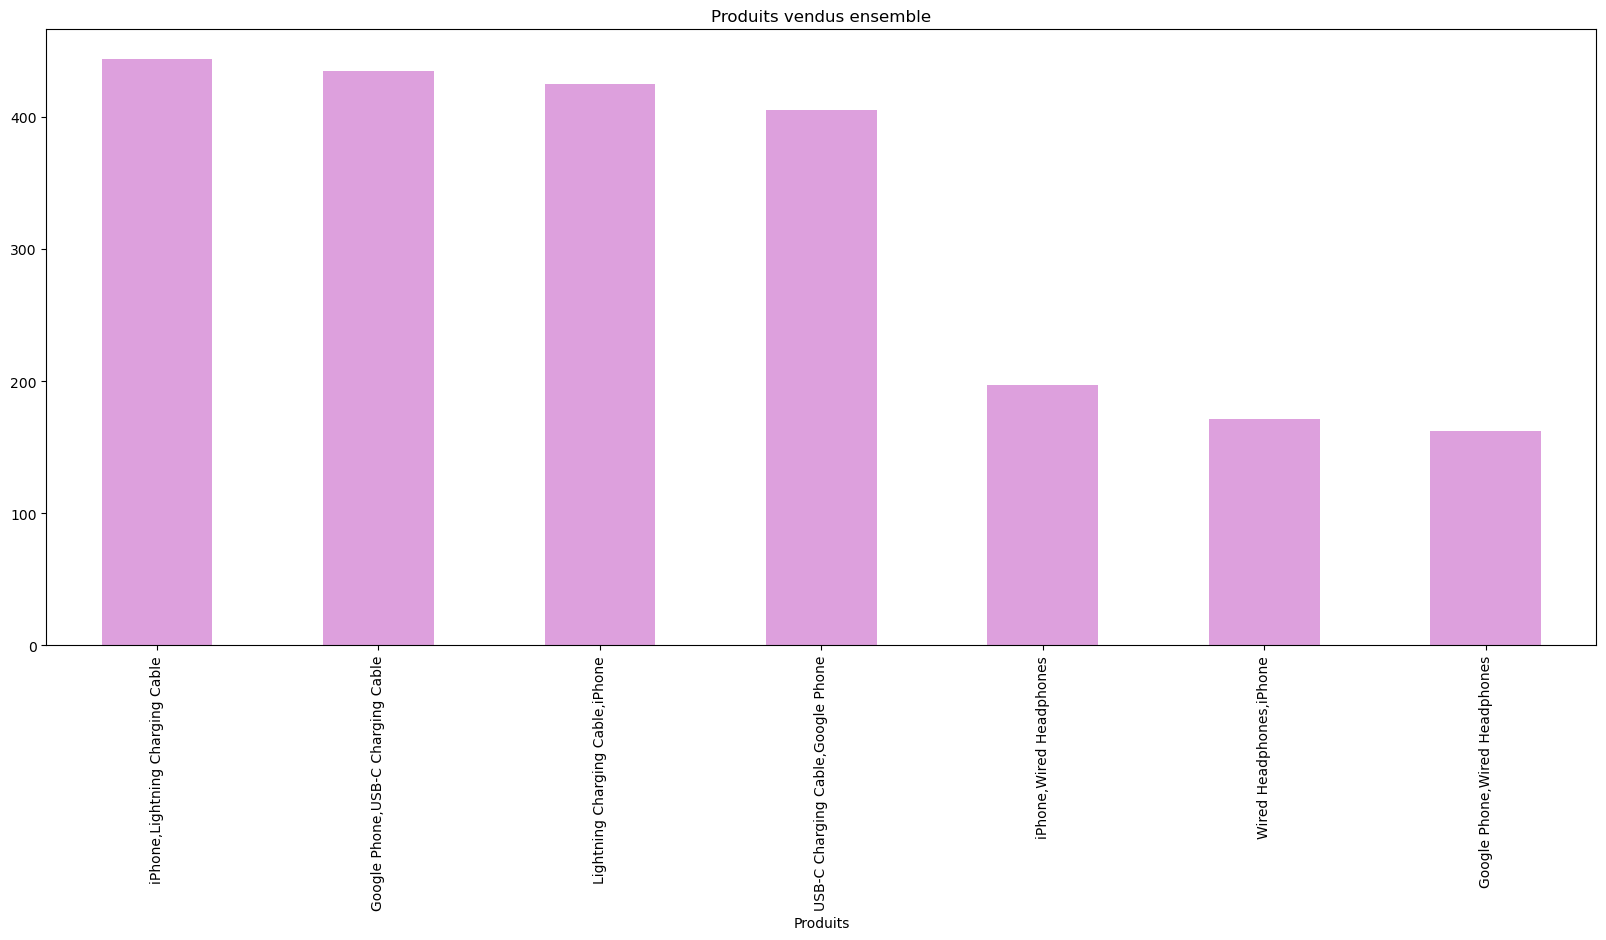

In [57]:
produit_vendu = df['Grouped'].value_counts()

les_produits_plus_vendu_ensemble = produit_vendu.idxmax()
les_produits_plus_moins_ensemble = produit_vendu.idxmin()

print(f"Les produits qui sont vendus le plus ensemble : {les_produits_plus_vendu_ensemble} ")
print(f"Les produits qui sont vendus le moins ensemble : {les_produits_plus_moins_ensemble} ")



fig = plt.figure(figsize=(20,8))
df['Grouped'].value_counts()[0:7].plot.bar(color='plum')
plt.title("Produits vendus ensemble")
plt.xlabel("Produits")
plt.show()

# Quel produit a-t-on le plus vendu et pourquoi ?


Produit le plus vendu : AAA Batteries (4-pack)
Parce qu'elles sont souvent utilisées dans de nombreux appareils tels que les télécommandes, les jouets, les appareils ménagers, etc. 
De plus, elles ont une bonne offre de prix, ce qui peut attirer les clients. Il est également possible que l'entreprise ait une forte stratégie de marketing pour ce produit.


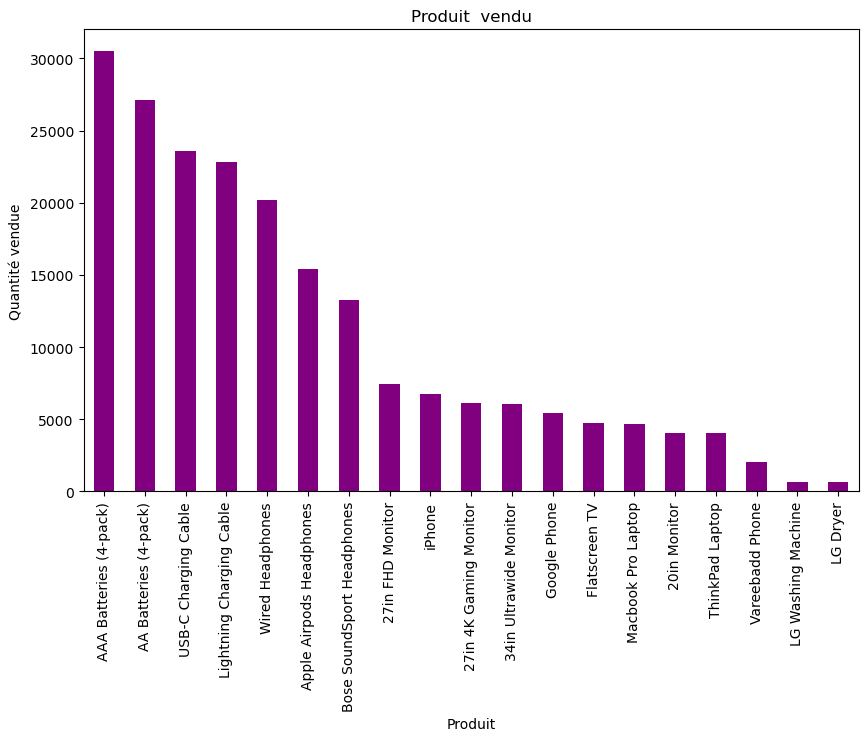

In [59]:
# Calculer la somme des quantités vendues pour chaque produit
produit_plus_vendu = DatasN.groupby('Product')['Quantity Ordered'].sum()

# Afficher le produit le plus vendu
produit_plus_vendu = produit_plus_vendu.sort_values(ascending=False).idxmax()
print("Produit le plus vendu :", produit_plus_vendu)
print("Parce qu'elles sont souvent utilisées dans de nombreux appareils tels que les télécommandes, les jouets, les appareils ménagers, etc. \nDe plus, elles ont une bonne offre de prix, ce qui peut attirer les clients. Il est également possible que l'entreprise ait une forte stratégie de marketing pour ce produit.")

# Tracer un diagramme à barres pour visualiser les ventes par produit
fig = plt.figure(figsize=(10, 6))
DatasN.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title("Produit  vendu")
plt.xlabel("Produit")
plt.ylabel("Quantité vendue")
plt.show()

# Quel sont les produits à vendre le mois de janvier 2020 (prédiction : utilisation d'un algorithme de machine Learning)

In [61]:
# Créer un dictionnaire de correspondance entre noms de mois et nombres de mois
mois = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
    
DatasN1 = DatasN

# Appliquer la correspondance pour convertir les noms de mois en nombres de mois
DatasN1['Months'] = DatasN1['Months'].map(mois)

In [62]:
def prediction_vente_janvier_2020(DatasN1):
    
    # S'assurer que le DataFrame est bien rempli avec des valeurs
    DatasN1 = DatasN1.fillna(0)
    DatasN1['Year'] = DatasN1['Order Date'].dt.year
    
    # Encodage one-hot pour la colonne 'Product'
    donnees_combinees_encoded = pd.get_dummies(DatasN1, columns=['Product'], drop_first=True)

    # Sélection des caractéristiques et de la cible
    features = ['Months', 'Year'] + [col for col in donnees_combinees_encoded.columns if 'Product_' in col]
    target = 'Quantity Ordered'
    X = donnees_combinees_encoded[features]
    y = donnees_combinees_encoded[target]

    # Division des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modèle de régression des forêts aléatoires
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Validation du modèle
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'Root Mean Squared Error (RMSE): {rmse}')

    # Prédiction pour janvier 2020
    january_2020_data = pd.DataFrame({
        'Months': [1, 1],  # Janvier
        'Year': [2020, 2020]  # 2020
    })

    # Ajout des colonnes Product pour chaque produit encodé
    for product in features[2:]:
        january_2020_data[product] = 0

    january_2020_predictions = model.predict(january_2020_data)
    january_2020_data['Predicted_Quantity'] = january_2020_predictions

    # Produits à vendre en janvier 2020 (tri par prévision)
    products_to_sell_january_2020 = january_2020_data.sort_values(by='Predicted_Quantity', ascending=False).drop('Predicted_Quantity', axis=1)
    Janvier2020 = products_to_sell_january_2020.columns.to_list()
    Janvier2020 = Janvier2020[2:]
    Janvier2020 = [c.replace('Product_', '') for c in Janvier2020]
    
    return f'Produits à vendre en janvier 2020 : {Janvier2020}'


resultat_prediction = prediction_vente_janvier_2020(DatasN1)
resultat_prediction

Root Mean Squared Error (RMSE): 0.41596082872642115


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


"Produits à vendre en janvier 2020 : ['27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']"

# Enregistrement  des Datas sous format 'csv'

In [64]:
# Spécifie le répertoire où tu veux enregistrer les fichiers CSV
repertoire_enregistrement = 'C:\\Users\\Acer\\Documents\\mon projet python\\new_data\\'

# 1. Enregistrer le DataFrame 'Data'
chemin_enregistrement_data = repertoire_enregistrement + 'DatasN.csv'
DatasN.to_csv(chemin_enregistrement_data, index=False)


# 2. Enregistrer le chiffre d'affaires par mois
chemin_enregistrement_chiffre_mois = repertoire_enregistrement + 'ChiffreParMois.csv'
DatasN.groupby('Months')['Chiffre d\'affaire'].sum().to_csv(chemin_enregistrement_chiffre_mois, header=['Sales'])

# 3. Enregistrer le chiffre d'affaires par ville
chemin_enregistrement_chiffre_ville = repertoire_enregistrement + 'ChiffreParVille.csv'
DatasN.groupby('Villes')['Chiffre d\'affaire'].count().sort_values(ascending=False).to_csv(chemin_enregistrement_chiffre_ville, header=['Sales'])


# 4. Enregistrer le chiffre d'affaires par heure
chemin_enregistrement_chiffre_heure = repertoire_enregistrement + 'ChiffreParHeure.csv'
DatasN.groupby('Hour')['Chiffre d\'affaire'].sum().sort_values(ascending=False).to_csv(chemin_enregistrement_chiffre_heure, header=['Sales'])


# 5. Enregistrer le nombre de produits vendus ensemble
chemin_enregistrement_produits_groupes = repertoire_enregistrement + 'ProduitsVendusEnsemble.csv'
df.groupby('Grouped')["Quantity Ordered"].count().sort_values(ascending=False).to_csv(chemin_enregistrement_produits_groupes, header=['Nombre de produits vendus ensemble'])


# 6. Enregistrer la quantité totale vendue par produit
chemin_enregistrement_quantite_produit = repertoire_enregistrement + 'QuantiteTotaleProduit.csv'
DatasN.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).to_csv(chemin_enregistrement_quantite_produit, header=['Quantité totale vendue par produit'])


# Interface graphique 

In [66]:
# Fonction pour afficher les données dans une fenêtre en utilisant treeview
def show_data():
    # Charger les données dans un dataframe
    DatasN = pd.read_csv("C:\\Users\\Acer\\Documents\\mon projet python\\new_data\\DatasN.csv")
    
    # Créer une fenêtre pour afficher les données
    win = tk.Toplevel()
    win.title("Données")
    
    # Créer un treeview pour afficher les données
    tree = ttk.Treeview(win)
    tree["columns"] = list(df.columns)
    tree["show"] = "headings"
    
    # Ajouter les colonnes du treeview
    for col in df.columns:
        tree.heading(col, text=col)
        tree.column(col, width=120)
    
    # Ajouter les lignes du treeview
    for index, row in df.iterrows():
        tree.insert("", "end", values=list(row))
    
    # Afficher le treeview
    tree.pack()    

In [67]:
def open_window1():
    
    message = tk.Label(cadreDroite, text = "Le meilleur mois de vente est le mois de décembre, son chiffre d'affaires est de 4557905.42 $", fg = 'red')
    message.pack()
        
    # Charger les données dans un dataframe
    df = pd.read_csv('C:\\Users\\Acer\\Documents\\mon projet python\\new_data\\ChiffreParMois.csv')
    
    message2 = tk.Label(cadreDroite, text = f"Le chiffre d'affaire annuel (2019) est de : {round(df['Sales'].sum(), 3)} $", fg = "red")
    message2.pack()

    
    # Créer le plot
    fig = plt.figure(figsize=(10,4))
    sns.barplot(x = df["Months"], y = df["Sales"], data = df, palette = "viridis")
    plt.title("Chiffre d'affaire global par mois")
    plt.xlabel("Mois")
    plt.ylabel("Chiffre d'affaire")
    plt.show()

    # Afficher le plot dans une fenêtre Tkinter
    canvas = FigureCanvasTkAgg(fig, master=cadreDroite)
    canvas.draw()
    canvas.get_tk_widget().pack(side='top', fill='both', expand=1)
    
    
    # Créer un treeview pour afficher les données
    tree = ttk.Treeview(cadreDroite)
    tree["columns"] = list(df.columns)
    tree["show"] = "headings"
    
    # Ajouter les colonnes du treeview
    for col in df.columns:
        tree.heading(col, text=col)
        tree.column(col, width=600)
    
    # Ajouter les lignes du treeview
    for index, row in df.iterrows():
        tree.insert("", "end", values=list(row))
    
    
    # Afficher le treeview
    tree.pack()    

In [68]:
def open_window2():
    Clear()

    # Créer la carte avec les marqueurs
    carte = folium.Map(location=[lat1, lon1], zoom_start=5)
    carte2 = folium.Map(location=[lat2, lon2], zoom_start=5)
    folium.Marker([lat1, lon1], popup=f"{ville_plus_vendue} - {ventes_plus_vendue} ventes - {round(ventes_par_ville1.max(), 3)} $", icon = folium.Icon(color = 'green')).add_to(carte)
    folium.Marker([lat2, lon2], popup=f"{ville_moins_vendue} - {ventes_moins_vendue} ventes - {round(ventes_par_ville1.min(), 3)} $", icon = folium.Icon(color = 'red')).add_to(carte)

    # Sauvegarder la carte au format HTML
    carte.save("carte_ventes.html")
    carte2.save("carte_ventes2.html")

    # Ouvrir la carte dans le navigateur web
    webbrowser.open("carte_ventes.html", "carte_ventes2.html")

    # Afficher le message dans la fenêtre Tkinter
    message = tk.Label(cadreDroite, text="La ville où on a le plus vendu de produits est : San Francisco", fg='red')
    message.pack()

    # Créer un treeview
    tree = ttk.Treeview(cadreDroite)
    tree["columns"] = ["Ville", "Quantité vendue", "Chiffre d'affaire"]
    tree["show"] = "headings"
    tree.heading("Ville", text="Ville")
    tree.heading("Quantité vendue", text = "Quantité vendue")
    tree.heading("Chiffre d'affaire", text = "Chiffre d'affaire ($)")
    tree.column("Ville", width=320)
    tree.column("Quantité vendue", width=320)
    tree.column("Chiffre d'affaire", width=320)
    tree.insert("", "end", values=[ville_plus_vendue, ventes_plus_vendue, ventes_par_ville1.max()])
    tree.insert("", "end", values=[ville_moins_vendue, ventes_moins_vendue, ventes_par_ville1.min()])

    # Afficher le treeview
    tree.pack()
    
    df = pd.read_csv('C:\\Users\\Acer\\Documents\\mon projet python\\new_data\\ChiffreParVille.csv')
    
    # Créer le plot
    fig = plt.figure(figsize=(10,4))
    sns.barplot(x = df["Sales"], y = df["Villes"], data = df, orient="h", palette = "viridis")
    plt.title("Quantité de produits vendus par ville")
    plt.xlabel("Quantité vendue")
    plt.show()

    # Afficher le plot dans une fenêtre Tkinter
    canvas = FigureCanvasTkAgg(fig, master=cadreDroite)
    canvas.draw()
    canvas.get_tk_widget().pack(side='top', fill='both', expand=1)

In [69]:
def open_window3():
    Clear()

    # Calculer le nombre de ventes pour chaque heure
    ventes_par_heure = DatasN.groupby('Hour')['Quantity Ordered'].sum()

    # Trouver l'heure avec le plus de ventes
    heure_plus_ventes = ventes_par_heure.idxmax()
    ventes_plus_ventes = ventes_par_heure.max()

    # Trouver l'heure avec le moins de ventes
    heure_moins_ventes = ventes_par_heure.idxmin()
    ventes_moins_ventes = ventes_par_heure.min()

    # Afficher les informations dans la fenêtre Tkinter
    message = tk.Label(cadreDroite, text = f"Heure avec le plus de ventes : {heure_plus_ventes} (Quantité vendue : {ventes_plus_ventes})", fg='red')
    message.pack()

    message2 = tk.Label(cadreDroite, text = f"Heure avec le moins de ventes : {heure_moins_ventes} (Quantité vendue : {ventes_moins_ventes})", fg='red')
    message2.pack()
    
    message3 = tk.Label(cadreDroite, text = f"Il est alors préférable de faire passer une page de publicité entre 10h et 11h, et entre 18h et 19h. \nEt éviter d'en faire passer entre 3h et 4h.", fg='red')
    message3.pack()
    
    # Tracer le graphique
    fig = plt.figure(figsize=(10, 4))
    plt.plot(ventes_par_heure.index, ventes_par_heure.values, marker='o', linestyle='-', color='b')
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
    plt.title('Nombre de ventes par heure')
    plt.xlabel('Heure du jour')
    plt.ylabel('Quantité vendue')
    plt.grid(True)

    # Afficher le graphique dans la fenêtre Tkinter
    canvas = FigureCanvasTkAgg(fig, master=cadreDroite)
    canvas.draw()
    canvas.get_tk_widget().pack(side='top', fill='both', expand=1)

In [70]:
def open_window4():
    Clear()
    
    message = tk.Label(cadreDroite, text=f"Les produits les plus achter ensemble sont {les_produits_plus_vendu_ensemble}",fg='red')
    message.pack()
    
    message3 = tk.Label(cadreDroite, text=f"Les produits les moins achter ensemble sont {les_produits_plus_moins_ensemble}",fg='red')
    message3.pack()
    
    # Charger les données dans un dataframe
    df = pd.read_csv('C:\\Users\\Acer\\Documents\\mon projet python\\new_data\\ProduitsVendusEnsemble.csv')
    
    # Créer le plot
    fig = plt.figure(figsize=(10,4))
    sns.barplot(x = df.head(10)["Nombre de produits vendus ensemble"], y = df.head(10)["Grouped"], data = df.head(10), 
                orient="h", palette = "viridis")
    plt.title("Produits vendus ensemble")
    plt.ylabel("Produits")
    plt.show()

    # Afficher le plot dans une fenêtre Tkinter
    canvas = FigureCanvasTkAgg(fig, master = cadreDroite)
    canvas.draw()
    canvas.get_tk_widget().pack(side='top', fill='both', expand=1)
    

    
    # Créer un treeview pour afficher les données
    tree = ttk.Treeview(cadreDroite)
    tree["columns"] = list(df.columns)
    tree["show"] = "headings"
    
    # Ajouter les colonnes du treeview
    for col in df.columns:
        tree.heading(col, text=col)
        tree.column(col, width=500)
    
    # Ajouter les lignes du treeview
    for index, row in df.iterrows():
        tree.insert("", "end", values=list(row))
    
    
    # Afficher le treeview
    tree.pack()        

In [71]:
def open_window5():
    Clear()
    
    message = tk.Label(cadreDroite, text="Le produit le plus vendu est le AAA Batteries (4-pack) \nParce qu'elles sont souvent utilisées dans de nombreux appareils tels que les télécommandes, les jouets, les appareils ménagers, etc. \nDe plus, elles ont une bonne offre de prix, ce qui peut attirer les clients. \nIl est également possible que l'entreprise ait une forte stratégie de marketing pour ce produit.",
                        fg='red')
    message.pack()
    
    # Charger les données dans un dataframe
    df = pd.read_csv('C:\\Users\\Acer\\Documents\\mon projet python\\new_data\\QuantiteTotaleProduit.csv')
    
    # Créer le plot
    fig = plt.figure(figsize=(10,5))
    sns.barplot(x = df["Quantité totale vendue par produit"], y = df["Product"], data = df, orient="h", palette = "viridis")
    plt.title("Les produits les plus vendus")
    plt.ylabel("Produits")
    plt.xlabel("Nombre de produits")
    plt.show()

    # Afficher le plot dans une fenêtre Tkinter
    canvas = FigureCanvasTkAgg(fig, master=cadreDroite)
    canvas.draw()
    canvas.get_tk_widget().pack(side='top', fill='both', expand=1)

    
    # Créer un treeview pour afficher les données
    tree = ttk.Treeview(cadreDroite)
    tree["columns"] = list(df.columns)
    tree["show"] = "headings"
    
    # Ajouter les colonnes du treeview
    for col in df.columns:
        tree.heading(col, text=col)
        tree.column(col, width=500)
    
    # Ajouter les lignes du treeview
    for index, row in df.iterrows():
        tree.insert("", "end", values=list(row))
    
    # Afficher le treeview
    tree.pack()    

In [72]:
def prediction_vente_janvier_2020(DatasN):
    
    DatasN = DatasN.fillna(0)
    DatasN['Year'] = DatasN['Order Date'].dt.year

    # Encodage one-hot pour la colonne 'Product'
    donnees_combinees_encoded = pd.get_dummies(DatasN, columns=['Product'], drop_first=True)

    # Sélection des caractéristiques et de la cible
    features = ['Months', 'Year'] + [col for col in donnees_combinees_encoded.columns if 'Product_' in col]
    target = 'Quantity Ordered'
    X = donnees_combinees_encoded[features]
    y = donnees_combinees_encoded[target]

    # Division des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modèle de régression des forêts aléatoires
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Prédiction pour janvier 2020
    january_2020_data = pd.DataFrame({
        'Months': [1, 1],  # Janvier
        'Year': [2020, 2020]  # 2020
    })

    # Ajout des colonnes Product pour chaque produit encodé
    for product in features[2:]:
        january_2020_data[product] = 0

    january_2020_predictions = model.predict(january_2020_data)
    january_2020_data['Predicted_Quantity'] = january_2020_predictions
    
    # Produits à vendre en janvier 2020 (tri par prévision)
    products_to_sell_january_2020 = january_2020_data.sort_values(by='Predicted_Quantity', ascending=False).drop('Predicted_Quantity', axis=1)
    Janvier2020 = products_to_sell_january_2020.columns.to_list()
    Janvier2020 = Janvier2020[2:]
    Janvier2020 = [c.replace('Product_', '') for c in Janvier2020]

    # Sauvegarde des résultats de la prédiction dans un fichier CSV
    january_2020_data.to_csv("C:\\Users\\Acer\\Documents\\mon projet python\\new_data\\" + 'resultats_prediction_janvier_2020.csv', index=False)


    return (Janvier2020)



def show_prediction_results():
    Clear()
    
    # Charger les résultats de la prédiction depuis le fichier CSV
    df_prediction_results = pd.read_csv('C:\\Users\\Acer\\Documents\\mon projet python\\new_data\\resultats_prediction_janvier_2020.csv')

    # Créer un treeview pour afficher les données
    tree = ttk.Treeview(cadreDroite, columns = ("Janvier 2020",), show = "headings")
    tree.heading("Janvier 2020", text="Prédiction des produits à vendre - Janvier 2020")
    tree.pack(expand=True, fill="both")
    
    # Ajouter les lignes du treeview
    for product in resultat_prediction:
        tree.insert("", "end", values=(product,))


    # Afficher le treeview
    tree.pack()

# Utilisation de la fonction avec vos données
resultat_prediction = prediction_vente_janvier_2020(DatasN)
print("Produits à vendre en Janvier 2020 :", resultat_prediction)

Produits à vendre en Janvier 2020 : ['27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']


In [73]:
def Clear():
    for widget in cadreDroite.winfo_children():
        if widget != label:
            widget.destroy()

# Design de l'interface graphique

C:\Users\Acer\AppData\Local\Temp\ipykernel_14148\2935017585.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df["Months"], y = df["Sales"], data = df, palette = "viridis")


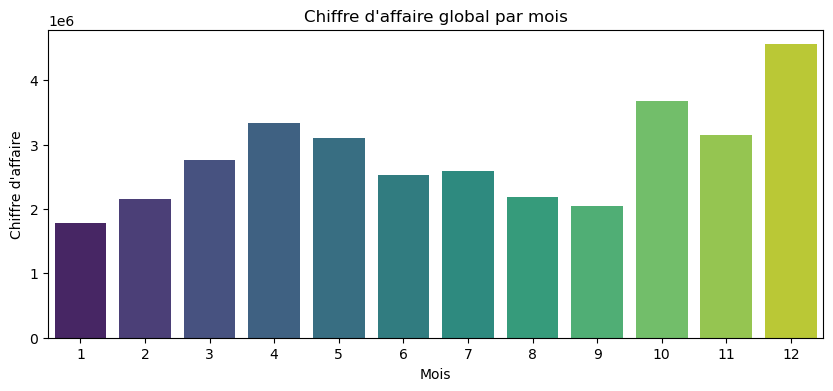

C:\Users\Acer\AppData\Local\Temp\ipykernel_14148\3831942433.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df["Sales"], y = df["Villes"], data = df, orient="h", palette = "viridis")


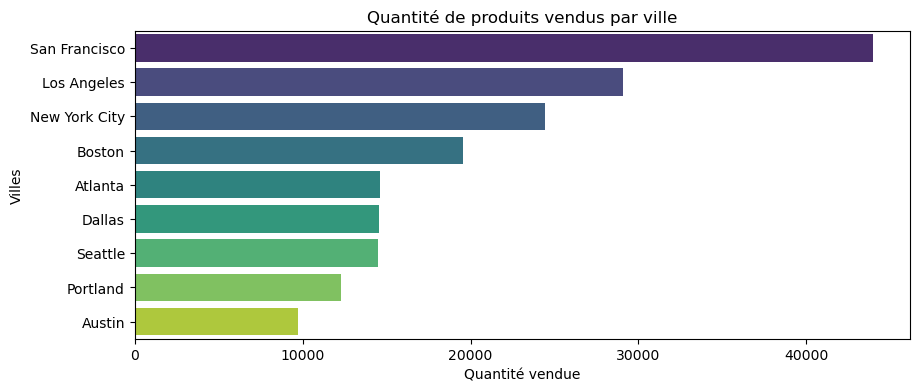

C:\Users\Acer\AppData\Local\Temp\ipykernel_14148\1403028979.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.head(10)["Nombre de produits vendus ensemble"], y = df.head(10)["Grouped"], data = df.head(10),


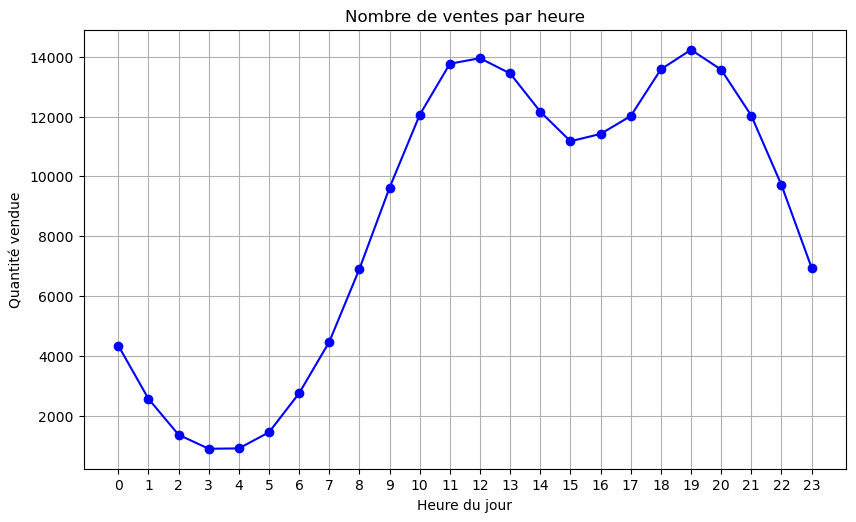

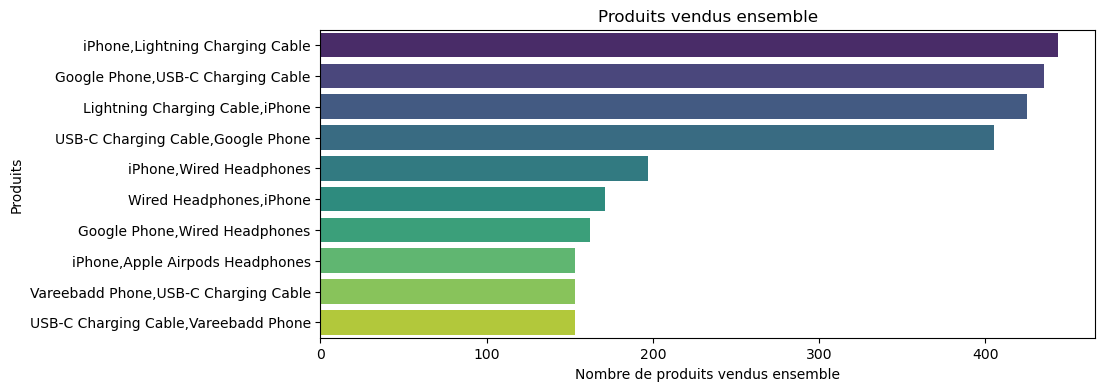

C:\Users\Acer\AppData\Local\Temp\ipykernel_14148\4013909812.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df["Quantité totale vendue par produit"], y = df["Product"], data = df, orient="h", palette = "viridis")


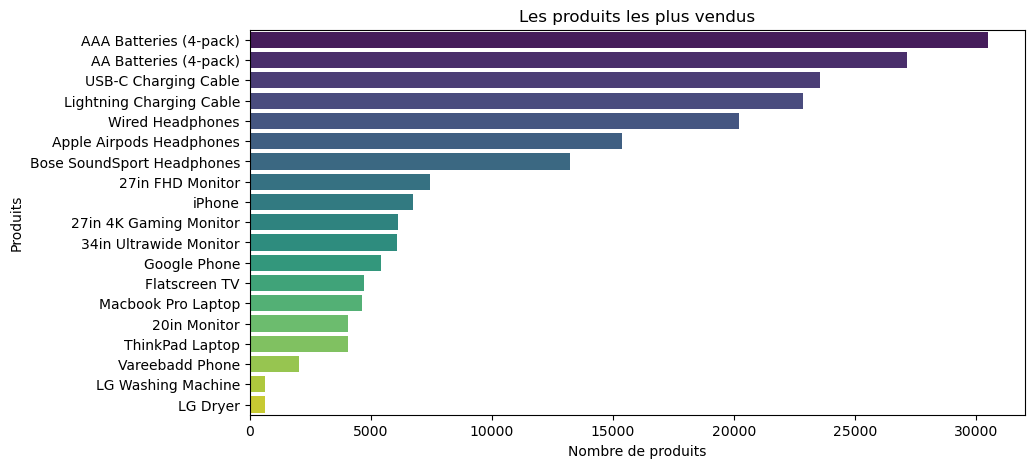

In [75]:
root = tk.Tk()

root.geometry("1200x700+200+50")
root.title("Analyse des ventes")
root.config(background = "orchid")
root.resizable(False, False)

cadreGauche = tk.Frame(root)
cadreGauche.config(bg = "#FF6600")
cadreGauche.configure(height = root.winfo_height(), width = 85)
cadreGauche.pack(side = tk.LEFT, fill = "y")

cadreDroite = tk.Canvas(root)
cadreDroite.pack(fill = "both", expand = True)

Images = Image.open('BG.png')

width, height = cadreDroite.winfo_reqwidth(), cadreDroite.winfo_reqheight()
resized_image = Images.resize((width, height), Image.NEAREST)
tk_image = ImageTk.PhotoImage(resized_image)

background_label = tk.Label(cadreDroite, image=tk_image)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

label = tk.Label(cadreDroite, text = "Welcome !", font = ("Times New Roman", 30))
label.pack()

boutonP = tk.Button(cadreGauche, text = "              Importer les données              ", command = show_data)
bouton1 = tk.Button(cadreGauche, text = "              Meilleur mois              ", command = open_window1)
bouton2 = tk.Button(cadreGauche, text = "              Meilleure ville              ", command = open_window2)
bouton3 = tk.Button(cadreGauche, text = "              Meilleure heure              ", command = open_window3)
bouton4 = tk.Button(cadreGauche, text = "              Combinaison              ", command = open_window4)
bouton5 = tk.Button(cadreGauche, text = "              Meilleur produit              ", command = open_window5)
bouton6 = tk.Button(cadreGauche, text = "              Prédiction 2020              ", command = show_prediction_results)
boutonD = tk.Button(cadreGauche, text = "              Quitter              ", bg="grey", fg="white", command = root.destroy)


boutonP.pack(side = tk.TOP, padx = 5, pady = 30, fill = "both")
bouton1.pack(side = tk.TOP, padx = 5, pady = 30, fill = "both")
bouton2.pack(side = tk.TOP, padx = 5, pady = 30, fill = "both")
bouton3.pack(side = tk.TOP, padx = 5, pady = 30, fill = "both")
bouton4.pack(side = tk.TOP, padx = 5, pady = 30, fill = "both")
bouton5.pack(side = tk.TOP, padx = 5, pady = 30, fill = "both")
bouton6.pack(side = tk.TOP, padx = 5, pady = 30, fill = "both")
boutonD.pack(side = tk.TOP, padx = 5, pady = 30, fill = "both")


root.mainloop()